## More image processing

In [1]:
# Weed to include the home directory in our path, so we can read it
# system stuff
import os 
import sys
sys.path.append(os.path.join(".."))

# image processing
import cv2
import numpy as np

# display utils
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

__Load image__

In [2]:
image = cv2.imread(os.path.join("..","data","img", "terasse.jpeg"))

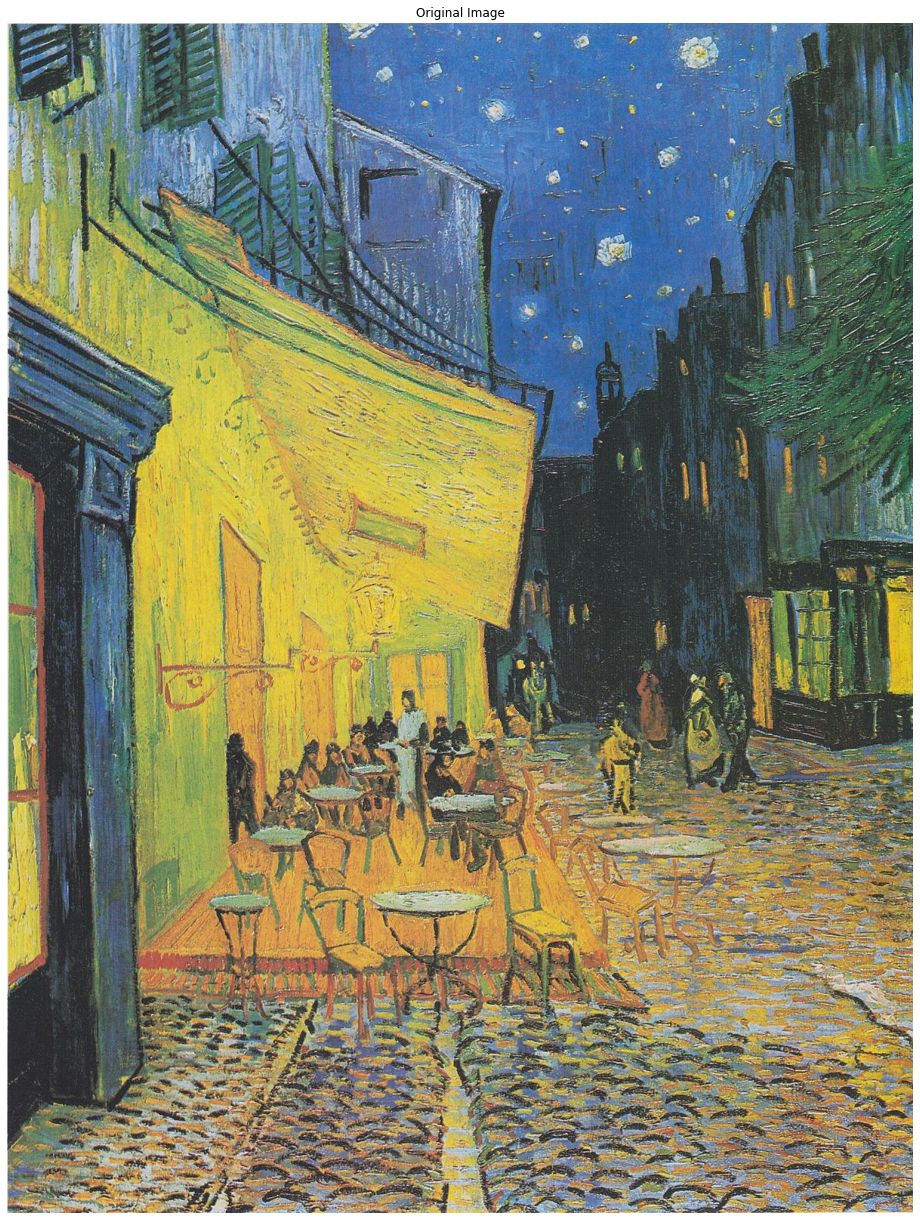

In [4]:
jimshow(image, "Original Image")

## Plot colour histograms
cv2.calcHist([image], channels, mask, histSize, ranges[, hist[, accumalte]])
<br>
- images: it is the source image of type uint8 or float32 represented as "[img]". 
- channels: it is the index of channel for which we calculate histogram. 
    - For grayscale image its value is [0] and 
    - color image you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively
- mask: mask image. To find histogram of full image, it is given as "None".
- histSize: this represents our BIN count. For full scale, we pass [256]- 
- ranges: This is our RANGE. Normally, it is [0,256]

__Only blue channel__

In [8]:
histB = cv2.calcHist([image], [0], None, [256], [0,256])

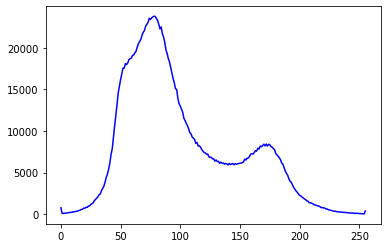

In [10]:
plt.plot(histB, color ="Blue")

In [14]:
histG = cv2.calcHist([image], [1], None, [256], [0,256])

In [16]:
histR = cv2.calcHist([image], [2], None, [256], [0,256])

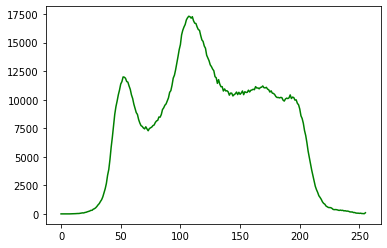

In [17]:
plt.plot(histG, color = "green")

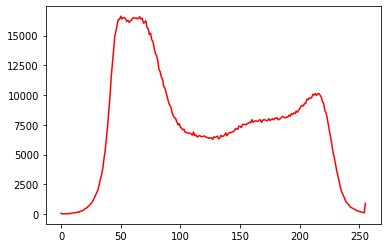

In [18]:
plt.plot(histR, color = "red")

__Split channels__

In [20]:
(BLUE, GREEN, RED) = cv2.split(image)

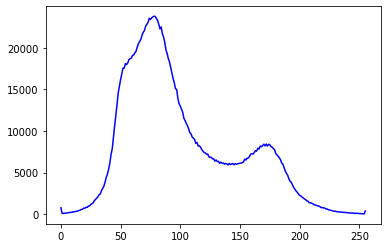

In [22]:
hist = cv2.calcHist([BLUE], [0], None, [256], [0,256])
plt.plot(hist, "Blue")

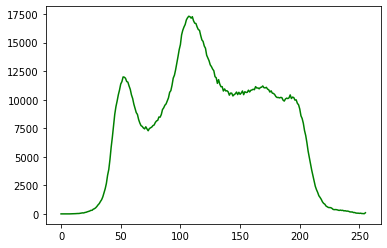

In [23]:
hist = cv2.calcHist([GREEN], [0], None, [256], [0,256])
plt.plot(hist, "Green")

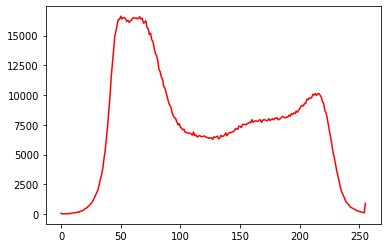

In [24]:
hist = cv2.calcHist([RED], [0], None, [256], [0,256])
plt.plot(hist, "red")

## Plot multiple channels at the same time

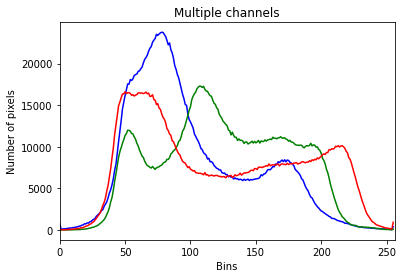

In [46]:
#Split channels
channels = cv2.split(image)

#Names of colours
color_names = ["b", "g", "r"]

#Create figure
plt.figure()

#Add title
plt.title ("Multiple channels")

#Add xlabel
plt.xlabel("Bins")

#Add ylabel
plt.ylabel("Number of pixels")

#Loop over our channels
#Notice how we include two objects(channel and color_name)
for channel, color_name in zip(channels, color_names):
    #Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    #Plot histogram
    plt.plot(hist, color = color_name)
    #Set limit of x-axis
    plt.xlim([0,256])
    
#Show the plot
plt.show()

In [28]:
channels

[array([[239, 238, 224, ...,  99,  95, 100],
        [244, 240, 149, ..., 110,  96,  80],
        [228, 237, 152, ..., 106,  98,  83],
        ...,
        [206, 168, 173, ..., 142, 137, 147],
        [214, 182, 178, ..., 103, 123, 144],
        [205, 147, 168, ..., 186, 194, 186]], dtype=uint8),
 array([[232, 237, 239, ...,  75,  77,  86],
        [237, 240, 160, ...,  86,  78,  66],
        [222, 234, 159, ...,  84,  82,  70],
        ...,
        [209, 171, 175, ..., 192, 187, 197],
        [233, 201, 198, ..., 151, 171, 192],
        [232, 174, 195, ..., 233, 241, 233]], dtype=uint8),
 array([[229, 233, 231, ...,  55,  60,  68],
        [234, 234, 152, ...,  68,  61,  48],
        [217, 229, 152, ...,  66,  65,  54],
        ...,
        [187, 149, 153, ..., 220, 215, 225],
        [224, 192, 186, ..., 169, 189, 210],
        [229, 170, 191, ..., 247, 255, 247]], dtype=uint8)]

In [35]:
color_names

['b', 'g', 'r']

In [36]:
channels

[array([[239, 238, 224, ...,  99,  95, 100],
        [244, 240, 149, ..., 110,  96,  80],
        [228, 237, 152, ..., 106,  98,  83],
        ...,
        [206, 168, 173, ..., 142, 137, 147],
        [214, 182, 178, ..., 103, 123, 144],
        [205, 147, 168, ..., 186, 194, 186]], dtype=uint8),
 array([[232, 237, 239, ...,  75,  77,  86],
        [237, 240, 160, ...,  86,  78,  66],
        [222, 234, 159, ...,  84,  82,  70],
        ...,
        [209, 171, 175, ..., 192, 187, 197],
        [233, 201, 198, ..., 151, 171, 192],
        [232, 174, 195, ..., 233, 241, 233]], dtype=uint8),
 array([[229, 233, 231, ...,  55,  60,  68],
        [234, 234, 152, ...,  68,  61,  48],
        [217, 229, 152, ...,  66,  65,  54],
        ...,
        [187, 149, 153, ..., 220, 215, 225],
        [224, 192, 186, ..., 169, 189, 210],
        [229, 170, 191, ..., 247, 255, 247]], dtype=uint8)]

In [37]:
list1 = [0,1,2,3]
list2 = [4,5,6,7]

In [39]:
list(zip(list1, list2))

[(0, 4), (1, 5), (2, 6), (3, 7)]

zip can be used to "zipping" dataframes or lists together at entry 1, entry 2 etc: [(0,0), (1,1), (etc.]


In [43]:
print(list(zip(list1,list2))[2])

(2, 6)


In [44]:
list(zip(channels, color_names))

[(array([[239, 238, 224, ...,  99,  95, 100],
         [244, 240, 149, ..., 110,  96,  80],
         [228, 237, 152, ..., 106,  98,  83],
         ...,
         [206, 168, 173, ..., 142, 137, 147],
         [214, 182, 178, ..., 103, 123, 144],
         [205, 147, 168, ..., 186, 194, 186]], dtype=uint8),
  'b'),
 (array([[232, 237, 239, ...,  75,  77,  86],
         [237, 240, 160, ...,  86,  78,  66],
         [222, 234, 159, ...,  84,  82,  70],
         ...,
         [209, 171, 175, ..., 192, 187, 197],
         [233, 201, 198, ..., 151, 171, 192],
         [232, 174, 195, ..., 233, 241, 233]], dtype=uint8),
  'g'),
 (array([[229, 233, 231, ...,  55,  60,  68],
         [234, 234, 152, ...,  68,  61,  48],
         [217, 229, 152, ...,  66,  65,  54],
         ...,
         [187, 149, 153, ..., 220, 215, 225],
         [224, 192, 186, ..., 169, 189, 210],
         [229, 170, 191, ..., 247, 255, 247]], dtype=uint8),
  'r')]

In [55]:
image2 = cv2.imread(os.path.join("..", "data", "img", "florence.jpg"))

In [56]:
image3 = cv2.imread(os.path.join("..", "data", "img", "beach.png"))

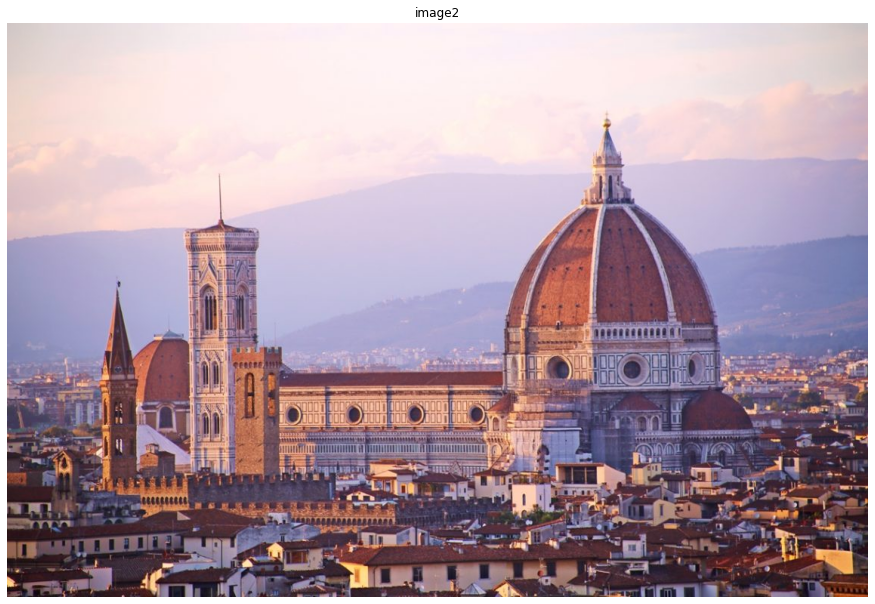

In [53]:
jimshow(image2, "image2")

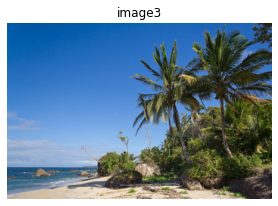

In [57]:
jimshow(image3, "image3")

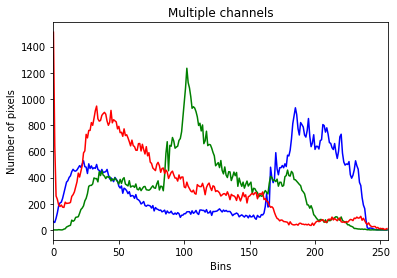

In [58]:
#Split channels
channels = cv2.split(image3)

#Names of colours
color_names = ["b", "g", "r"]

#Create figure
plt.figure()

#Add title
plt.title ("Multiple channels")

#Add xlabel
plt.xlabel("Bins")

#Add ylabel
plt.ylabel("Number of pixels")

#Loop over our channels
#Notice how we include two objects(channel and color_name)
for channel, color_name in zip(channels, color_names):
    #Create a histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])
    #Plot histogram
    plt.plot(hist, color = color_name)
    #Set limit of x-axis
    plt.xlim([0,256])
    
#Show the plot
plt.show()

In [59]:
hist1 = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
#all three channels (0,1,2) no mask (None), 8 bins for each channel and min 
#max value for each channel (0,256)

In [60]:
#copy this for image 2 and make hist2
hist2 = cv2.calcHist([image2], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])


__MinMax normalization__

(value-min) / (max-min)

In [67]:
hist1 = cv2.normalize(hist1, hist1, 0,255, cv2.NORM_MINMAX)
hist2 = cv2.normalize(hist2, hist2, 0,255, cv2.NORM_MINMAX)

In [68]:
#Distance similarity of the two histograms with cv2.compareHist
cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

66998.49502013643

In [69]:
cv2.compareHist(hist1, hist1, cv2.HISTCMP_CHISQR)

0.0

In [73]:
#The output number shows how much the similarity is. Chi-square is the measure. 
#Round can be used to make it easier to read

In [74]:
round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

66998.5

In [75]:
hist3 = cv2.calcHist([image3], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])

In [76]:
hist3 = cv2.normalize(hist3, hist3, 0,255, cv2.NORM_MINMAX)

In [79]:
round(cv2.compareHist(hist2, hist3, cv2.HISTCMP_CHISQR), 2)

2270709.3

In [80]:
round(cv2.compareHist(hist1, hist3, cv2.HISTCMP_CHISQR), 2)

8214448.78

In [81]:
data = cv2.imread(os.path.join("..", "data", "17flowers.tar")

SyntaxError: unexpected EOF while parsing (<ipython-input-81-576019dfadbc>, line 1)